In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
all_data = pd.read_csv("IS.csv")
all_data.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [33]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate


In [31]:
all_data = all_data.dropna(how='all')
all_data.head()


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,cost


In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate


In [40]:
all_data['cost']=all_data['Tuition_USD']+ all_data['Rent_USD']+all_data['Visa_Fee_USD']+all_data['Insurance_USD'] 

all_data = all_data[all_data["Program"] == "Computer Science"].dropna()
all_data = all_data[
    (all_data["Program"] == "Computer Science")
     & (all_data["Level"] == "Master")
].dropna()


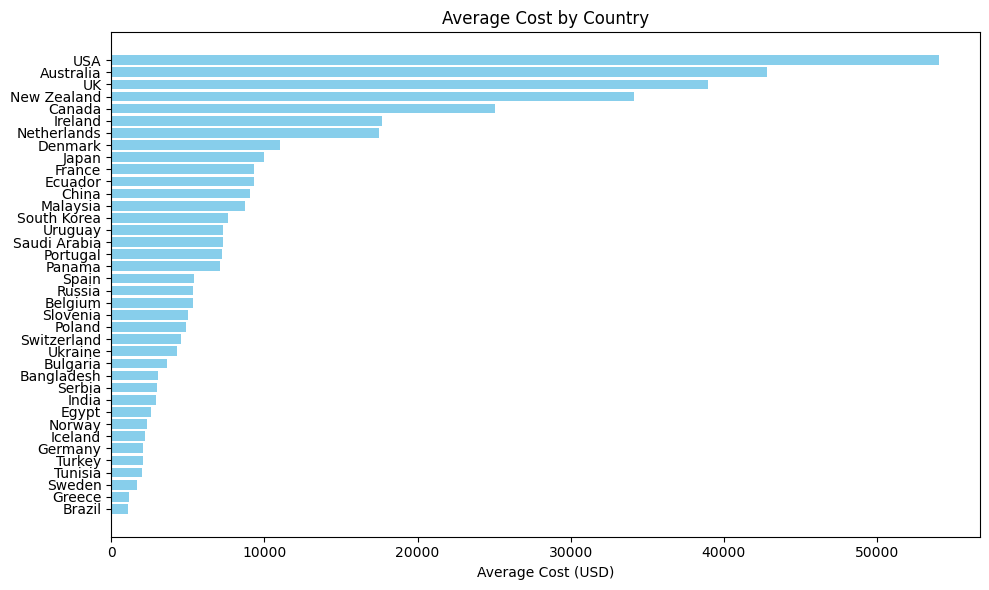

In [47]:
import matplotlib.pyplot as plt

# Calculate average cost per university
avg_cost = all_data.groupby('Country')['cost'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(avg_cost.index, avg_cost.values, color='skyblue')
plt.xlabel('Average Cost (USD)')
plt.title('Average Cost by Country')
plt.tight_layout()
plt.show()